# `Business Understanding`

Training a machine learning model to predict the `product category` based on the other features.

# `Data Understanding`

## Importation of all necessary packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [3]:
df= pd.read_csv('dollar_tree-231012-195712.csv')
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [31]:
# Convert 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,34867.0,17433.000000,10065.380254,0.000000,8716.500000,17433.0,26149.50,34866.0
Year,34866.0,2015.569237,0.495190,2015.000000,2015.000000,2016.0,2016.00,2016.0
Customer Age,34866.0,36.382895,11.112902,17.000000,28.000000,35.0,44.00,87.0
Quantity,34866.0,2.002524,0.813936,1.000000,1.000000,2.0,3.00,3.0
Unit Cost,34866.0,349.880567,490.015846,0.670000,45.000000,150.0,455.00,3240.0
Unit Price,34866.0,389.232485,525.319091,0.666667,53.666667,179.0,521.00,5082.0
Cost,34866.0,576.004532,690.500395,2.000000,85.000000,261.0,769.00,3600.0
Revenue,34867.0,640.870093,736.640033,2.000000,102.000000,319.0,902.00,5082.0
Column1,2574.0,688.054913,774.200897,2.000000,104.250000,390.5,975.75,3681.0


In [26]:
df= df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [32]:

print(df.describe(include="object").T)

                  count unique              top   freq
Date              34866    576         3/1/2016    196
Month             34866     12             June   3680
Customer Gender   34866      2                M  17805
Country           34866      4    United States  18076
State             34866     45       California  10332
Product Category  34866      3      Accessories  22534
Sub Category      34866     17  Tires and Tubes  11112


# `Data Preparation`

## Data Cleaning

In [34]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Column1             0
dtype: int64


In [4]:
# Handle missing values (if any)
df =df.dropna(subset=['Column1'])

In [5]:
df['Product Category'].unique()    

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

<Axes: xlabel='Product Category'>

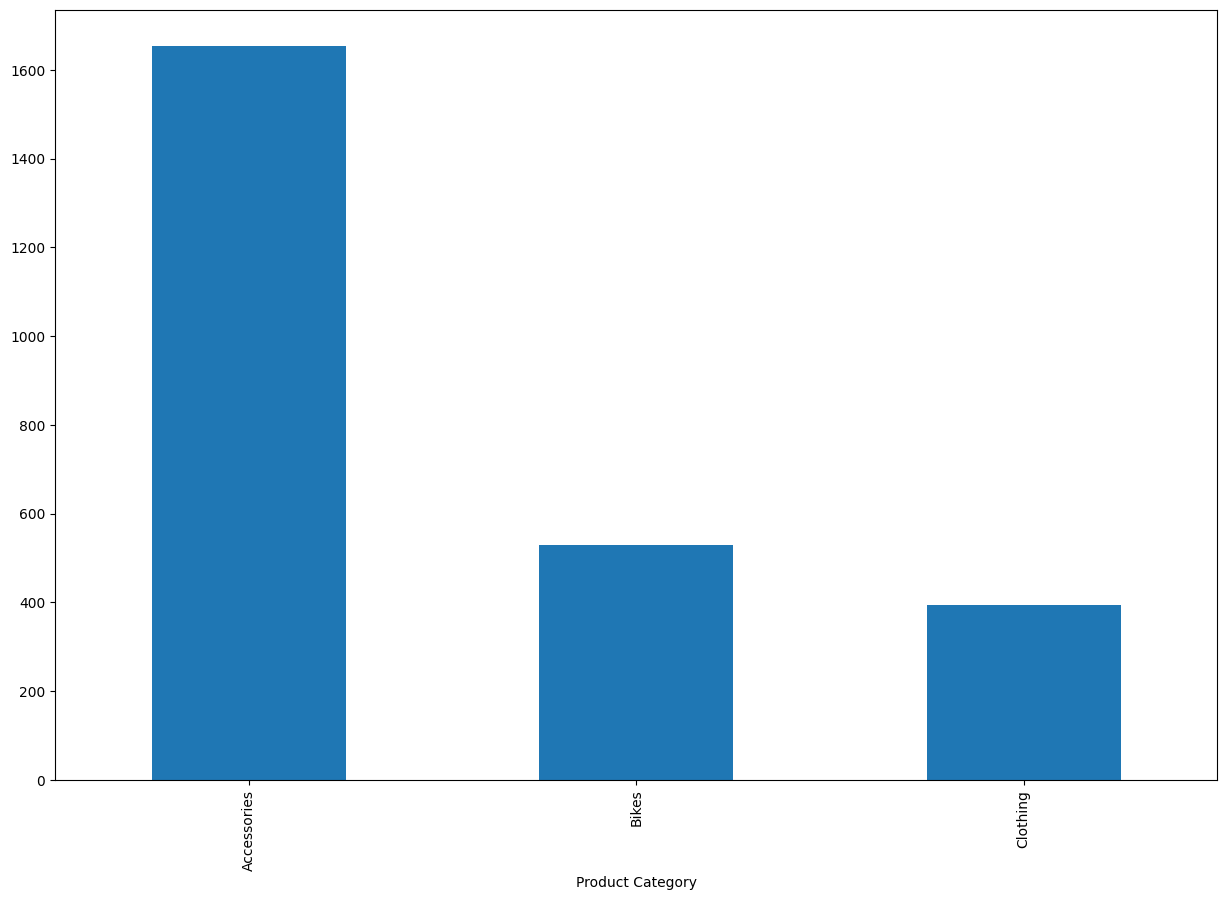

In [36]:
df['Product Category'].value_counts().plot (kind= 'bar', figsize=(15,10))

Three unique categories means we've got three classes in making predictions to.
More predictions would lead towards acessoriess since it has a high value counts.

lets try and find the correlation of the other columns or features in predicting the Product category.

In [37]:
(
    df
    # Run correlation
    .corr(numeric_only=True)
    # style the corr matrix
    .style
    .background_gradient(cmap='RdBu', vmin=-4, vmax=1)
)

# from the correlation below, with the numeric data, UnitCost, Unit Price, Cost And Revenue have high correlations to the data,

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.065933,0.044758,-0.011046,0.002201,0.018526,-0.000649,0.013564,-0.145997
Year,0.065933,1.000000,0.030756,0.002136,-0.090760,-0.036794,-0.109711,-0.049603,-0.025333
Customer Age,0.044758,0.030756,1.000000,-0.009799,0.050574,0.049880,0.044563,0.047117,0.001198
Quantity,-0.011046,0.002136,-0.009799,1.000000,-0.302189,-0.312680,0.021970,0.022828,-0.024744
Unit Cost,0.002201,-0.090760,0.050574,-0.302189,1.000000,0.980216,0.853940,0.836708,0.021894
Unit Price,0.018526,-0.036794,0.049880,-0.312680,0.980216,1.000000,0.829739,0.849717,0.019971
Cost,-0.000649,-0.109711,0.044563,0.021970,0.853940,0.829739,1.000000,0.978789,0.024892
Revenue,0.013564,-0.049603,0.047117,0.022828,0.836708,0.849717,0.978789,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


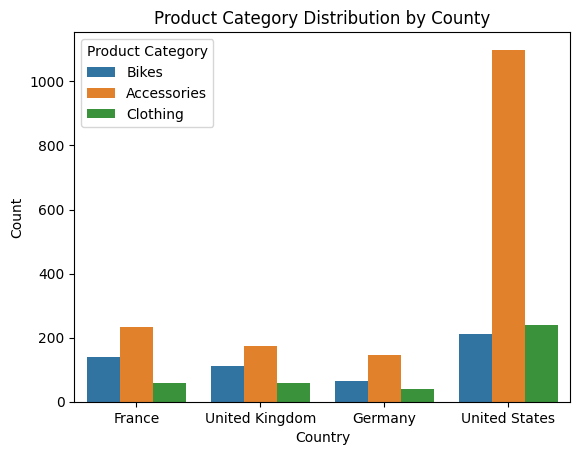

From the graph, Country would be a good predictor of The Product Category.It shows that the United States has more purchases to acessories as compared to the others.Purchases from countries would be a good predictor of these three classes


In [6]:
# Does customer location (Country) influence Product Category distribution?
sns.countplot(x='Country', hue='Product Category', data=df)
plt.title('Product Category Distribution by County')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()
print('From the graph, Country would be a good predictor of The Product Category.It shows that the United States has more purchases to acessories as compared to the others.Purchases from countries would be a good predictor of these three classes')

In [8]:
# Dropping redundant or irrelevant columns: Year and Month are already contained in the Date whiles index will be repetitive
data = df.drop(columns=['index', 'Year', 'Month','Column1'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2574 entries, 312 to 2935
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2574 non-null   object 
 1   Customer Age      2574 non-null   float64
 2   Customer Gender   2574 non-null   object 
 3   Country           2574 non-null   object 
 4   State             2574 non-null   object 
 5   Product Category  2574 non-null   object 
 6   Sub Category      2574 non-null   object 
 7   Quantity          2574 non-null   float64
 8   Unit Cost         2574 non-null   float64
 9   Unit Price        2574 non-null   float64
 10  Cost              2574 non-null   float64
 11  Revenue           2574 non-null   float64
dtypes: float64(6), object(6)
memory usage: 261.4+ KB


In [9]:
# Transforming date into datetime series
# Converting data types

data['Date'] = pd.to_datetime(data['Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2574 entries, 312 to 2935
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2574 non-null   datetime64[ns]
 1   Customer Age      2574 non-null   float64       
 2   Customer Gender   2574 non-null   object        
 3   Country           2574 non-null   object        
 4   State             2574 non-null   object        
 5   Product Category  2574 non-null   object        
 6   Sub Category      2574 non-null   object        
 7   Quantity          2574 non-null   float64       
 8   Unit Cost         2574 non-null   float64       
 9   Unit Price        2574 non-null   float64       
 10  Cost              2574 non-null   float64       
 11  Revenue           2574 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 261.4+ KB


## Divide data into input and output

In [10]:
# Features and target definition 
X = data.drop('Product Category', axis=1)
y = data['Product Category']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
 

X_train shape: (2059, 11)
X_test shape: (515, 11)
y_train shape: (2059,)
y_test shape: (515,)


## Encoding

### 1. Encode the target column (the labels)


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
y= df['Product Category']

### 2. Encode categorical columns

In [12]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Verifying the transformed dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2574 entries, 312 to 2935
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2574 non-null   datetime64[ns]
 1   Customer Age      2574 non-null   float64       
 2   Customer Gender   2574 non-null   int32         
 3   Country           2574 non-null   int32         
 4   State             2574 non-null   int32         
 5   Product Category  2574 non-null   int32         
 6   Sub Category      2574 non-null   int32         
 7   Quantity          2574 non-null   float64       
 8   Unit Cost         2574 non-null   float64       
 9   Unit Price        2574 non-null   float64       
 10  Cost              2574 non-null   float64       
 11  Revenue           2574 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(5)
memory usage: 211.1 KB


In [67]:
data.head()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
312,2016-01-11,40.0,1,0,28,1,11,3.0,567.0,790.0,1701.0,2370.0
313,2016-01-11,40.0,1,0,28,0,7,2.0,192.5,199.0,385.0,398.0
314,2016-01-18,40.0,1,0,28,1,10,2.0,1160.0,1511.5,2320.0,3023.0
315,2016-01-18,40.0,1,0,28,0,2,2.0,115.0,147.0,230.0,294.0
316,2016-01-18,40.0,1,0,28,0,2,1.0,140.0,167.0,140.0,167.0


### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


# `Modeling`

In [69]:
# Convert datetime format to an integer format representing Unix timestamps for for X_train and X_test
X_train['Date'] = X_train['Date'].astype('int64') // 10**9
X_test['Date'] = X_test['Date'].astype('int64') // 10**9

In [70]:
# Choosing a classifier
classifier = RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest classifier on the training dataset
ran_frx = RandomForestClassifier(random_state=42)
ran_frx.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

In [ ]:
# Evaluate the model on the test set
y_pred = ran_frx.predict(X_test)
y_pred

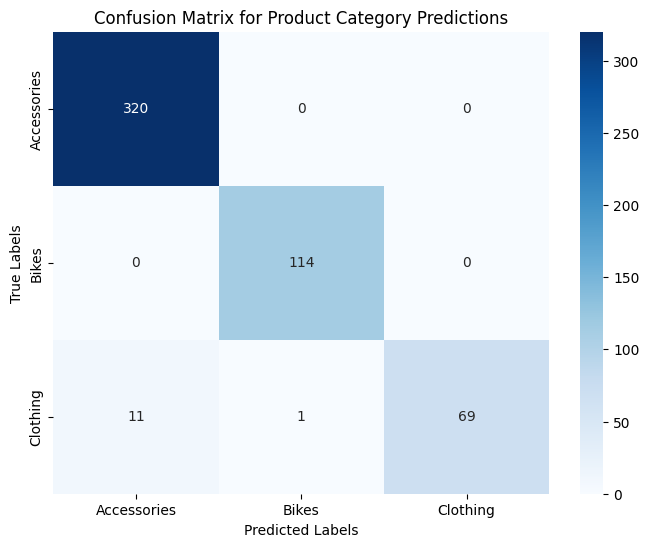

In [77]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Product Category'].classes_, yticklabels=label_encoders['Product Category'].classes_)
plt.title('Confusion Matrix for Product Category Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Build a classification Report

In [78]:
# Evaluation metrics again
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

0.9766990291262136
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       320
           1       0.99      1.00      1.00       114
           2       1.00      0.85      0.92        81

    accuracy                           0.98       515
   macro avg       0.99      0.95      0.97       515
weighted avg       0.98      0.98      0.98       515



*****Summary***

From The Classification Report above, accuracy was about 97% which means that 97% of all predictions were correct.

The model demonstrates high precision, recall, and F1-score across all classes, with an overall accuracy of 97%, indicating its effectiveness in predicting product categories.


# Thank you